In [282]:
import numpy as np
import matplotlib.pyplot as plt

In [283]:
class Preceptron :
    def __init__(self,input_size):
        self.weights = np.zeros(input_size)
        self.bias =0
            
    @staticmethod
    def step(x) :
        return 1 if x>=0 else 0
    
    def predict(self,x):
        return Preceptron.step(x @ self.weights + self.bias)
    
    
    def train(self ,X ,t):
        for _ in range(50):
            for i,x in enumerate(X):
                y_predict =self.predict(x)
                self.weights = self.weights + (t[i]-y_predict) * x
                self.bias = self.bias + (t[i]-y_predict)


    
    

In [284]:
X = [[a,b] for a in range(2) for b in range(2)]

X =np.array(X)

or_output = np.array([0,1,1,1])


OR_F = Preceptron(2)

OR_F.train(X ,or_output)

print(f"{OR_F.weights}, weights")

print(f"{OR_F.bias }, bias")
for x in X :
    print(f" x :{x}  , {OR_F.predict(x)}  ")

[1. 1.], weights
-1, bias
 x :[0 0]  , 0  
 x :[0 1]  , 1  
 x :[1 0]  , 1  
 x :[1 1]  , 1  


# XOR

In [285]:
# x y'
xy = np.array([0,0,1,0])
xy_bf = Preceptron(2)
xy_bf.train(X , xy)

for x in X :
    print(f" {x} : {xy_bf.predict(x)} ")
    

print("")
    
# x' y
xcy = np.array([0,1,0,0])
xcy_bf = Preceptron(2)
xcy_bf.train(X , xcy)

for x in X :
    print(f" {x} : {xcy_bf.predict(x)} ")
    

h =[]
for x in X:
    h.append([xcy_bf.predict(x) , xy_bf.predict(x)])

print(h)
h =np.array(h)

#XOR
xor_output = np.array([0,1,1,0])
xor_BF = Preceptron(2)
xor_BF.train(h ,xor_output)
print(f" {xor_BF.weights} ,weights ")
print(f"{xor_BF.bias} ,bias")
for a in range(len(h)) :
    print(f" x :{h[a]} , {xor_BF.predict(h[a])} ")




    


 [0 0] : 0 
 [0 1] : 0 
 [1 0] : 1 
 [1 1] : 0 

 [0 0] : 0 
 [0 1] : 1 
 [1 0] : 0 
 [1 1] : 0 
[[0, 0], [1, 0], [0, 1], [0, 0]]
 [1. 1.] ,weights 
-1 ,bias
 x :[0 0] , 0 
 x :[1 0] , 1 
 x :[0 1] , 1 
 x :[0 0] , 0 


# f=[(ax′z)+(ay′)]⋅[(xy)+(xz)′]

In [286]:
def part1(x):
    return int(( x[0] and(not x[1]) and x[3] ) or (x[0] and (not x[2])))

def part2(x):
    return int( (x[1] and x[2] )or  not( x[1] and x[3] ) )

def target(x):
    return int(part1(x) and part2(x))


In [287]:
S = [ [a,x,y,z]  for a in range(2) for x in range(2) for y in range(2) for z in range(2) ]
S =np.array(S)
target_part1 =np.array([part1(x) for x in S])

p1 =Preceptron(4)
p1.train(S, target_part1)

for i,x in enumerate(S) :
    print(f" x target :{target_part1[i]} , predict : {p1.predict(x)}   ")
    



 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :0 , predict : 0   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :0 , predict : 0   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :0 , predict : 0   
 x target :0 , predict : 0   


In [288]:

target_part2 =np.array( [part2(x) for x in S] )
p2 =Preceptron(4)
p2.train(S ,target_part2)

for i,x in enumerate(S) :
    print(f" x target :{target_part2[i]} , predict : {p2.predict(x)}   ")
    
    

 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :0 , predict : 0   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :1 , predict : 1   
 x target :0 , predict : 0   
 x target :1 , predict : 1   
 x target :1 , predict : 1   


In [289]:
target_both = np.array( [target(x) for x in S])

s =[]
for x in S:
    s.append([p1.predict(x) , p2.predict(x)])

s =np.array(s)
    
bf = Preceptron(2)
bf.train(s , target_both)

for i, x in enumerate(s):
    print(f"x: {x} | target: {target_both[i]} | predict: {bf.predict(x)}")


x: [0 1] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [0 0] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [1 1] | target: 1 | predict: 1
x: [1 1] | target: 1 | predict: 1
x: [0 1] | target: 0 | predict: 0
x: [1 1] | target: 1 | predict: 1
x: [1 1] | target: 1 | predict: 1
x: [1 0] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0
x: [0 1] | target: 0 | predict: 0


In [290]:
def calcLine( x1 ,y1 ,x2 ,y2 ):
    m  = (y2-y1) /(x2-x1)
    y =  f" {m}x - {-m*x1} +{y1} "
    
    mX1 = -m
    mX2 =1
    bias= -y1 + m *x1
    return  np.array([mX1 ,mX2 ,bias])

In [291]:
# line 1
a= calcLine(1,0,0,1)
print("w1",a[0])
print( "w2",a[1])
print("b",a[2])
# line 2
b =calcLine(1,0,0,-1)
print("w1",b[0])
print( "w2",b[1])
print("b",b[2])
# line 3
c =calcLine(0,1,-1,0)
print("w1",c[0])
print( "w2",c[1])
print("b",c[2])
# line 4
d =calcLine(-1,0,0,-1)
print("w1",d[0])
print( "w2",d[1])
print("b",d[2])


w1 1.0
w2 1.0
b -1.0
w1 -1.0
w2 1.0
b 1.0
w1 -1.0
w2 1.0
b -1.0
w1 1.0
w2 1.0
b 1.0


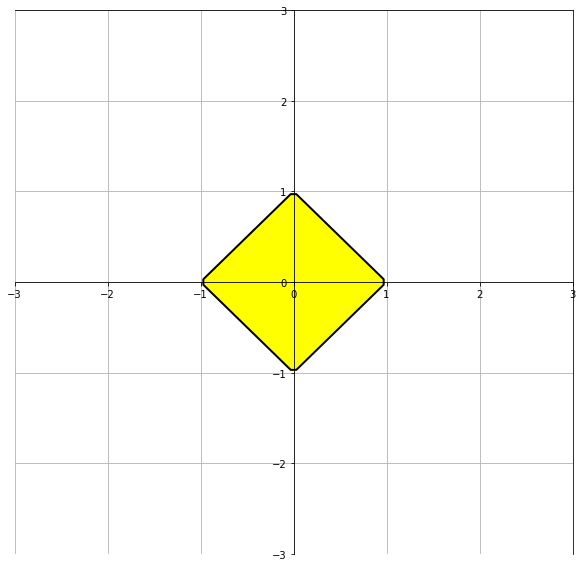

In [292]:
limitPoint = 3

X = np.linspace(-limitPoint, limitPoint, 100)
Y = np.linspace(-limitPoint, limitPoint, 100)
X, Y = np.meshgrid(X, Y)
Xf = X.flatten()
Yf = Y.flatten()

z = a[0]*X + a[1]*Y +a[2]
z2 =b[0]*X + b[1]*Y +b[2]
z3 =c[0]*X + c[1]*Y +c[2]
z4 =d[0]*X + d[1]*Y +d[2]


output  = (z  <= 0).astype(int)
output2 = (z2 >= 0).astype(int)   
output3 = (z3 <= 0).astype(int)
output4 = (z4 >= 0).astype(int)

# plt.contourf(X, Y, output,  levels=[0.5, 1.5], colors="yellow")
# plt.contourf(X, Y, output2, levels=[0.5, 1.5], colors="yellow")
# plt.contourf(X, Y, output3, levels=[0.5, 1.5], colors="yellow")
# plt.contourf(X, Y, output4, levels=[0.5, 1.5], colors="yellow")

result = output * output2 * output3 * output4
plt.figure(figsize=(10,10))
# contourf بترسم الشكل من جوا
plt.contourf(X, Y, result, levels=[0.5, 1.5], colors="yellow")
# contour بترسم الحدود
plt.contour(X, Y, result, levels=[0.5], colors='black', linewidths=2)

plt.grid(True)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')




plt.show()

# Star 

In [293]:
l1 = calcLine(0,3,1,1)
print("w1",l1[0])
print( "w2",l1[1])
print("b",l1[2])
print("")
l2 = calcLine(1,1,3,0)
print("w1",l2[0])
print( "w2",l2[1])
print("b",l2[2])
print("")
l3 = calcLine(3,0,1,-1)
print("w1",l3[0])
print( "w2",l3[1])
print("b",l3[2])
print("")
l4 = calcLine(1,-1,2,-3)
print("w1",l4[0])
print( "w2",l4[1])
print("b",l4[2])
print("")
l5 = calcLine(2,-3,0,-2)
print("w1",l5[0])
print( "w2",l5[1])
print("b",l5[2])
print("")
l6 = calcLine(0,-2,-2,-3)
print("w1",l6[0])
print( "w2",l6[1])
print("b",l6[2])
print("")
l7 = calcLine(-2,-3,-1,-1)
print("w1",l7[0])
print( "w2",l7[1])
print("b",l7[2])
print("")
l8 = calcLine(-1,-1,-3,0)
print("w1",l8[0])
print( "w2",l8[1])
print("b",l8[2])
print("")
l9 = calcLine(-3,0,-1,1)
print("w1",l9[0])
print( "w2",l9[1])
print("b",l9[2])
print("")
l10 = calcLine(-1,1,0,3)
print("w1",l10[0])
print( "w2",l10[1])
print("b",l10[2])
print("")

w1 2.0
w2 1.0
b -3.0

w1 0.5
w2 1.0
b -1.5

w1 -0.5
w2 1.0
b 1.5

w1 2.0
w2 1.0
b -1.0

w1 0.5
w2 1.0
b 2.0

w1 -0.5
w2 1.0
b 2.0

w1 -2.0
w2 1.0
b -1.0

w1 0.5
w2 1.0
b 1.5

w1 -0.5
w2 1.0
b -1.5

w1 -2.0
w2 1.0
b -3.0



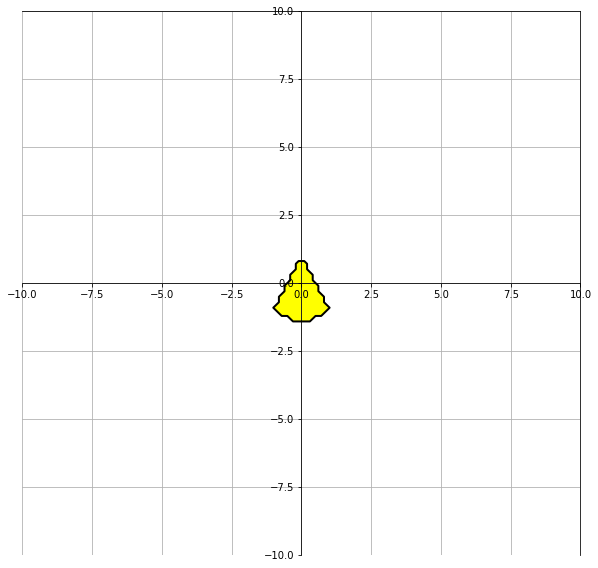

In [294]:
limitPoint = 10

X = np.linspace(-limitPoint, limitPoint, 100)
Y = np.linspace(-limitPoint, limitPoint, 100)
X, Y = np.meshgrid(X, Y)


z1 = l1[0]*X + l1[1]*Y +l1[2]
z2 = l2[0]*X + l2[1]*Y +l2[2]
z3 = l3[0]*X + l3[1]*Y +l3[2]
z4 = l4[0]*X + l4[1]*Y +l4[2]
z5 = l5[0]*X + l5[1]*Y +l5[2]
z6 = l6[0]*X + l6[1]*Y +l6[2]
z7 = l7[0]*X + l7[1]*Y +l7[2]
z8 = l8[0]*X + l8[1]*Y +l8[2]
z9 = l9[0]*X + l9[1]*Y +l9[2]
z10= l10[0]*X + l10[1]*Y +l10[2]



o1  = (z1  <= 0).astype(int)
o2  = (z2  <= 0).astype(int)
o3  = (z3  >= 0).astype(int)
o4  = (z4  <= 0).astype(int)
o5  = (z5  >= 0).astype(int)
o6  = (z6  >= 0).astype(int)
o7  = (z7  <= 0).astype(int)
o8  = (z8  >= 0).astype(int)
o9  = (z9  <= 0).astype(int)
o10 = (z10  <= 0).astype(int)

# plt.contourf(X, Y, o10,  levels=[0.5, 1.5], colors="yellow")
# plt.contourf(X, Y, o1,  levels=[0.5, 1.5], colors="yellow")

result = o1 * o2 * o3 * o4 * o5 * o6 * o7 * o8 * o9 * o10 
plt.figure(figsize=(10,10))
# contourf بترسم الشكل من جوا
plt.contourf(X, Y, result, levels=[0.5, 1.5], colors="yellow")
# contour بترسم الحدود
plt.contour(X, Y, result, levels=[0.5], colors='black', linewidths=2)



plt.grid(True)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')




/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


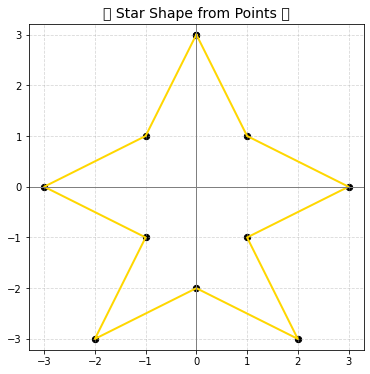

In [295]:
import matplotlib.pyplot as plt

# النقاط اللي انتي كتبتيها
points = [
    (0, 3), (1, 1), (3, 0), (1, -1),
    (2, -3), (0, -2), (-2, -3), (-1, -1),
    (-3, 0), (-1, 1), (0, 3)
]

# نفصل الإحداثيات X و Y
x = [p[0] for p in points]
y = [p[1] for p in points]

plt.figure(figsize=(6,6))
plt.plot(x, y, color='gold', linewidth=2)   # الخطوط بين النقاط
plt.scatter(x, y, color='black', s=40)      # النقاط نفسها

# تظبيط الشكل
plt.axis('equal')   # عشان النسب تكون مضبوطة
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("⭐ Star Shape from Points ⭐", fontsize=14)

# نرسم المحاور في المنتصف
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

plt.show()


In [296]:
l1 = calcLine(0,1,1,-1)
print("w1",l1[0])
print( "w2",l1[1])
print("b",l1[2])
print("")
l2 = calcLine(1,-1,-1,-1)
print("w1",l2[0])
print( "w2",l2[1])
print("b",l2[2])
print("")
l3 = calcLine(-1,-1,0,1)
print("w1",l3[0])
print( "w2",l3[1])
print("b",l3[2])
print("")

w1 2.0
w2 1.0
b -1.0

w1 0.0
w2 1.0
b 1.0

w1 -2.0
w2 1.0
b -1.0



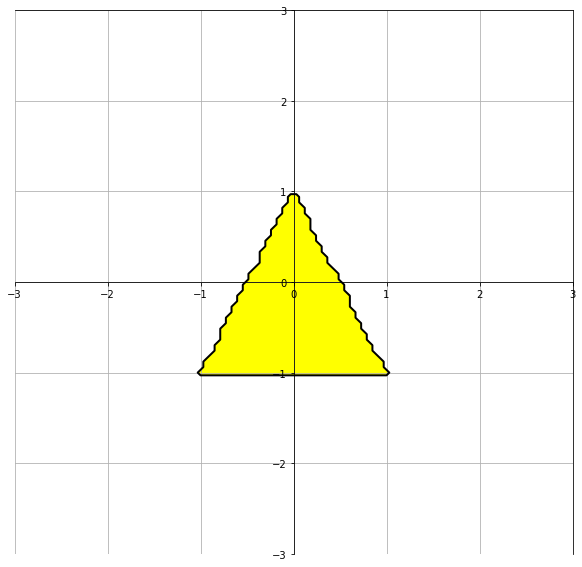

In [297]:
limitPoint = 3

X = np.linspace(-limitPoint, limitPoint, 100)
Y = np.linspace(-limitPoint, limitPoint, 100)
X, Y = np.meshgrid(X, Y)


z1 = l1[0]*X + l1[1]*Y +l1[2]
z2 = l2[0]*X + l2[1]*Y +l2[2]
z3 = l3[0]*X + l3[1]*Y +l3[2]




o1  = (z1  <= 0).astype(int)
o2  = (z2  >= 0).astype(int)
o3  = (z3  <= 0).astype(int)


# plt.contourf(X, Y, o3,  levels=[0.5, 1.5], colors="yellow")
# plt.contourf(X, Y, o1,  levels=[0.5, 1.5], colors="yellow")

result = o1 * o2 * o3 
plt.figure(figsize=(10,10))

plt.contourf(X, Y, result, levels=[0.5, 1.5], colors="yellow")

plt.contour(X, Y, result, levels=[0.5], colors='black', linewidths=2)



plt.grid(True)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.show()